# Assignment 4
### Chandinee C

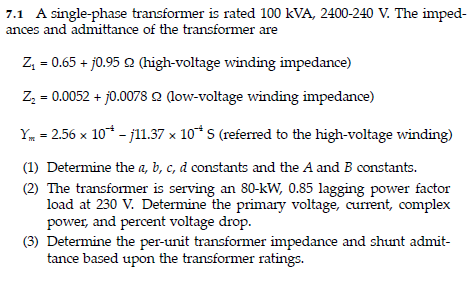

Let nt be the turn ratio <br>
$n_{t} = \frac{N2}{N1} $<br> 

Let Zt be the transfomer impedence with Z1 refered in Secondary side <br>
$Z_{t} = n_{t}^{2}Z_{1} + Z_{2}$ <br>
$E_{2} = n_{t}.E_{1}$ <br>
$I_{1}= n_{t}.I_{L}$ <br>

$
 \left[ {\begin{array}{cc}
   V_{S}  \\
   I_{S} \\
  \end{array} } \right]
   =
  \left[ {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right]
  .
  \left[ {\begin{array}{cc}
   V_{L}  \\
   I_{L} \\
  \end{array} } \right]
$

$V_{S} = a.V_{L} + b.I_{L}$<br> 
$I_{S} = c.V_{L} + d.I_{L}$<br>
By KVL on secondary side we get <br>
$E_{2}=Z_{t}.I_{L} + V_{L}$<br>
$V_{S} = \frac{Z_{t}}{n_{t}}.I_{L} + \frac{V_{L}}{n_{t}}$<br><br>
$a = \frac{1}{n_{t}} \quad \quad b = \frac{Z_{t}}{n_{t}} $ <br><br>
By KCL on primary side we get <br>
$I_{S}=Y_{m}.V_{S} + I_{L}$ <br>
$I_{S} = (\frac{Z_{t}.Y_{m}}{n_{t}} + n_{t}).I_{L} + \frac{Y_{m}}{n_{t}}.V_{L}$<br><br>
$c =  \frac{Y_{m}}{n_{t}} \quad \quad d=\frac{Z_{t}.Y_{m}}{n_{t}} + n_{t} $ <br><br>

Inverse of $V_{S} = a.V_{L} + b.I_{L}$ we get<br>
$V_{L} = (V_{S} - b.I_{L}).a^{-1}$<br>
$V_{L} = (V_{S} - \frac{Z_{t}}{n_{t}}.I_{L}).n_{t}$<br><br>
$A = n_{t} \quad \quad B = Z_{t}$


In [1]:
# Given values
S = 100  # kVA
E1 = 2400  # V
E2 = 240  # V
Z1 = 0.65 + 0.95j  # ohms
Z2 = 0.0052 + 0.0078j  # ohms
Ym = 0.000256 - 0.001137j  # S

# Calculating turns ratio
nt = E2 / E1

# Calculate Zt
Zt = (nt ** 2)*Z1 + Z2

In [2]:
# Calculate a,b,c,d
a =  1 / nt 
b = Zt / nt
c = Ym / nt
d = ((Zt * Ym) / nt) + nt

# Calculate A and B constants
A_const = nt
B_const = Zt


print(f"a : {a:.2f}")
print(f"b : {b:.6f}")
print(f"c : {c:.6f}")
print(f"d : {d:.6f}")
print(f"A : {A_const:.2f}")
print(f"B : {B_const:.6f}")

a : 10.00
b : 0.117000+0.173000j
c : 0.002560-0.011370j
d : 0.100227-0.000089j
A : 0.10
B : 0.011700+0.017300j


In [3]:
import math
#Given 
P_l = 80 # kW
V_l = 230 # V
pf= 0.85


Q_l = P_l * math.tan(math.acos(pf)) * 1j # Q = P tan(theta)
S_l = P_l - Q_l # lagging load

# S = VI*
Il_conj = (S_l * 1000 )/V_l

I_l = Il_conj.conjugate()

# Primary side Voltage and Current
V_s = a * V_l + b*I_l
I_s = c * V_l + d*I_l

# Complex Power at Primary
S_s = V_l * (I_s.conjugate())

# Voltage Drop 
#V_drop = Zt * I_l
V_drop_percent = (abs(E2-V_l)/E2) * 100


print(f"Primary Voltage : {V_s:.2f} V")
print(f"Primary Current : {I_s:.6f} I")
print(f"Complex Power : {S_s:.6f} VA")
print(f"Voltage drop percentage : {V_drop_percent:.6f} %")

Primary Voltage : 2303.40+85.39j V
Primary Current : 35.469374+18.959216j I
Complex Power : 8157.955979-4360.619780j VA
Voltage drop percentage : 4.166667 %


In [4]:
# Base values
Sbase = 100  # kVA
V1base = 2400  # V
V2base = 240  # V
Zbase_1 = (V1base **2) / Sbase
Zbase_2 = (V2base **2) / Sbase
Ybase_1 = 1/Zbase_1

# Calculate per-unit impedance values
Z1_pu = Z1 / Zbase_1
Z2_pu = Z2 / Zbase_2
#Zt_pu = (nt ** 2)* Z1_pu + Z2_pu
Zt_pu = Zt /  Zbase_2
Ym_pu = Ym /  Ybase_1

print(f"Transformer Impedence Z1: {Z1_pu:.6f} pu")
print(f"Transformer Impedence Z2: {Z2_pu:.6f} pu")
print(f"Transformer Impedence Zt: {Zt_pu:.6f} pu")
print(f"Shunt Admitance : {Ym_pu} pu")


Transformer Impedence Z1: 0.000011+0.000016j pu
Transformer Impedence Z2: 0.000009+0.000014j pu
Transformer Impedence Zt: 0.000020+0.000030j pu
Shunt Admitance : (14.7456-65.4912j) pu


## Q2)
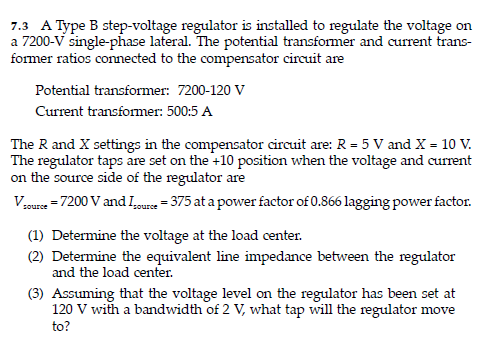

In [5]:
def print_info(class_name, print_info=False, ppty=[]):
    dss.Basic.SetActiveClass(class_name)
    #dss.ActiveClass.Name(class_name)
    print(dss.ActiveClass.ActiveClassName())
    elementExists = dss.ActiveClass.First()
    i = None
    v = None
    while elementExists:
        print( dss.ActiveClass.Name())
        if print_info:
            for p in dss.Element.AllPropertyNames():
                if ppty:
                    if p  in ppty:
                       print(dss.Element.Name(), p , dss.Properties.Value(p))
                else:
                    print(dss.Element.Name(), p , dss.Properties.Value(p))
        else:
            i = dss.CktElement.Currents()
            v = dss.CktElement.Voltages()
            print("I (mag): ", dss.CktElement.CurrentsMagAng()[::2])
            print("V (mag): ", dss.CktElement.VoltagesMagAng()[::2])
            print(f"P: { dss.CktElement.Powers()[0::2]}")
            print(f"Q: { dss.CktElement.Powers()[1::2]}")
        print("")
        elementExists = dss.ActiveClass.Next()
    return i, v

In [6]:
#power factor = 0.866, lagging angle for current
angle=math.acos(0.866) * (180.0 / math.pi)
#print(angle)

import opendssdirect as dss
cmd = dss.utils.run_command

reply = cmd("clear")
# Create Slack
reply = cmd("new circuit.slack basekv=7.2 angle=0 pu=1.00 Z1=[0, 0.0000000001] Z0=[0, 0.0000000001] phases=1 bus1=main_node.1")
print(reply)


reply = cmd(f"New iSource.load1 bus1=node_1.1 phases=1 amps=-375 angle={angle}") 

print(reply)

#reply = cmd("New Line.line1 Length=10000 Units=ft bus1=main_node.1 bus2=node_1.1 phases=1")
#print(reply)



In [7]:
from math import *

# 120V base 
vBase = 120
CTp = 500
CTs = 5

Npt = 7200 /  vBase

print("vBase: ", vBase)
print("Npt: ", Npt)
#Calculate load voltages at 120V base
Vload_120base = [x/Npt for x in dss.Circuit.AllBusVMag()[-2:]]
print("Vload_120base: ", Vload_120base)
#Calculate CT
CT = CTp / CTs
print("CT: ", CT)

R =5
X=10

vBase:  120
Npt:  60.0
Vload_120base:  [0.0]
CT:  100.0


In [8]:
tap_Num = 10
tap_pu = 1 + (0.0065*tap_Num) 

reply = cmd(f"New Transformer.A phases=1 Windings=2 XHL=0.0001 wdg=1 tap={tap_pu} bus=main_node.1 %R=0.0001 Conn=wye kV=7.2 kva=5000 wdg=2 XHL=0.0001 bus=node_1.1 %R=0.0001 Conn=wye kV=7.2 kva=5000")

# Solve load flow
reply = cmd("solve")
print(reply)


In [9]:
print_info("Vsource")
iI, iV = print_info("Line")
print_info("iSource")
print(dss.Circuit.AllBusVMag())

Vsource
source
I (mag):  [352.108010495479, 352.108010495479]
V (mag):  [7200.000000017607, 0.0]
P: [-2195.492957419139, 0.0]
Q: [1267.6499992702911, 0.0]

Line
Isource
load1
I (mag):  [374.99999999999994, 374.99999999999994]
V (mag):  [6760.5585904537975, 0.0]
P: [2195.4900421394427, 0.0]
Q: [-1267.7186355201645, 0.0]

[7200.000000017607, 6760.5585904537975]


In [10]:
print_info("transformer", True,  ppty=["taps"])

Transformer
a
Transformer.a taps [1.065, 1, ]



(None, None)

#### a) Volatge at load = 6760.558 V
We see a drop in voltage <br>
After adding regullator we should see increase in voltage

In [11]:
reply = cmd(f"New regcontrol.REGULATORA transformer=A winding=1 vreg={vBase} band=2 ptratio={Npt} CTprim={CTp} R={R} X={X}")

reply = cmd("solve")
print(reply)

In [12]:
print_info("transformer", True,  ppty=["taps"])
print(dss.RegControls.TapNumber())

Transformer
a
Transformer.a taps [1.065, 1, ]

10


In [13]:
print_info("Vsource")
iI, iV = print_info("Line")
print_info("iSource")
print(dss.Circuit.AllBusVMag())

Vsource
source
I (mag):  [352.108010495479, 352.108010495479]
V (mag):  [7200.000000017607, 0.0]
P: [-2195.492957419139, 0.0]
Q: [1267.6499992702911, 0.0]

Line
Isource
load1
I (mag):  [374.99999999999994, 374.99999999999994]
V (mag):  [6760.5585904537975, 0.0]
P: [2195.4900421394427, 0.0]
Q: [-1267.7186355201645, 0.0]

[7200.000000017607, 6760.5585904537975]
